In [68]:
import matplotlib.pyplot as plt
import random,numpy as np
import seaborn as sb
sb.set()
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [138]:

data = pd.read_csv("data.csv", index_col = 'id')
data = data.drop('Unnamed: 32', 1)

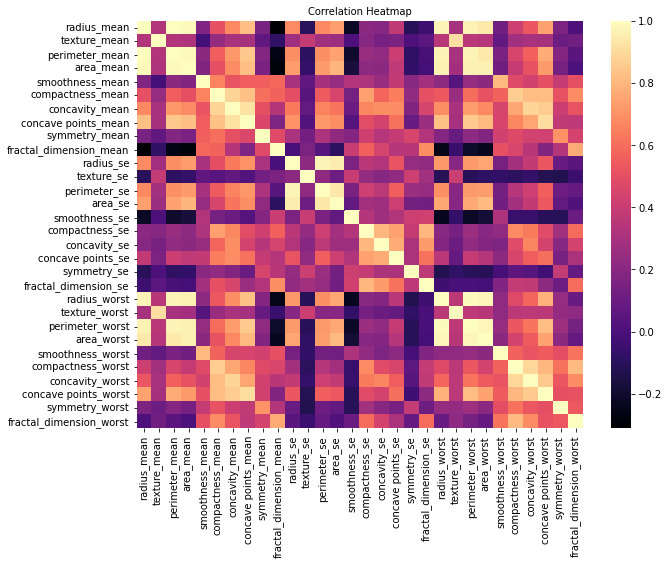

In [67]:
plt.figure(figsize=(10, 7.5))
heat = sb.heatmap(data.corr(), cmap='magma',annot=False) 
heat.set_title('Correlation Heatmap', fontdict={'fontsize':10});

In [70]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B':0})
y = data.diagnosis                          # M or B 
list = ['diagnosis']
x = data.drop(list,axis = 1 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

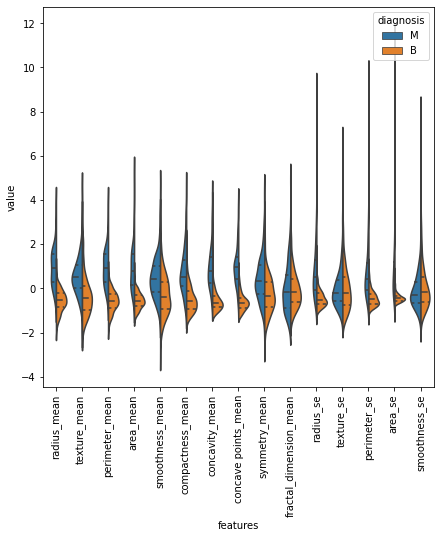

In [43]:
data_dia = y
data_new = x
data_n_2 = (data_new - data_new.mean()) / (data_new.std())              # standardization
data_new = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data_new = pd.melt(data_new,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,7))
sb.violinplot(x="features", y="value", hue="diagnosis", data=data_new,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

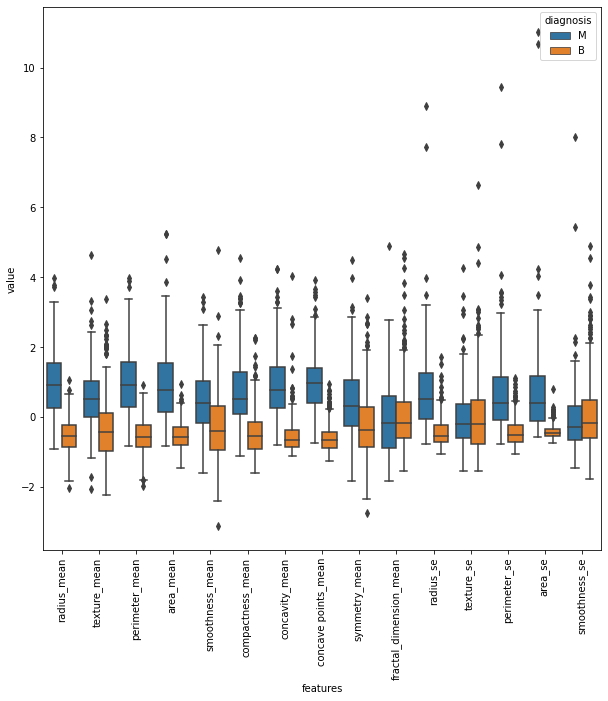

In [46]:
plt.figure(figsize=(10,10))
sb.boxplot(x="features", y="value", hue="diagnosis", data=data_new)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

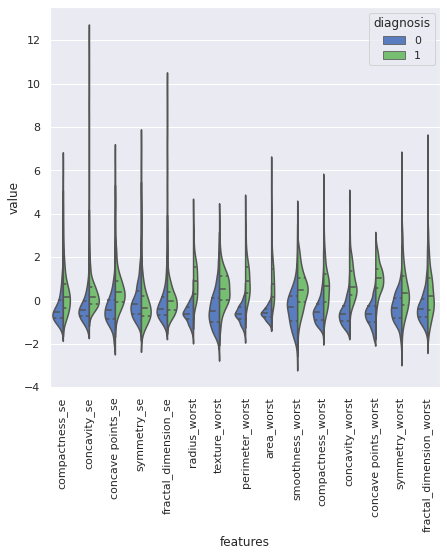

In [107]:
data_dia = y
data_new = x
data_n_2 = (data_new - data_new.mean()) / (data_new.std())              # standardization
data_new = pd.concat([y,data_n_2.iloc[:,15:30]],axis=1)
data_new = pd.melt(data_new,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,7))
sb.violinplot(x="features", y="value", hue="diagnosis", data=data_new,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

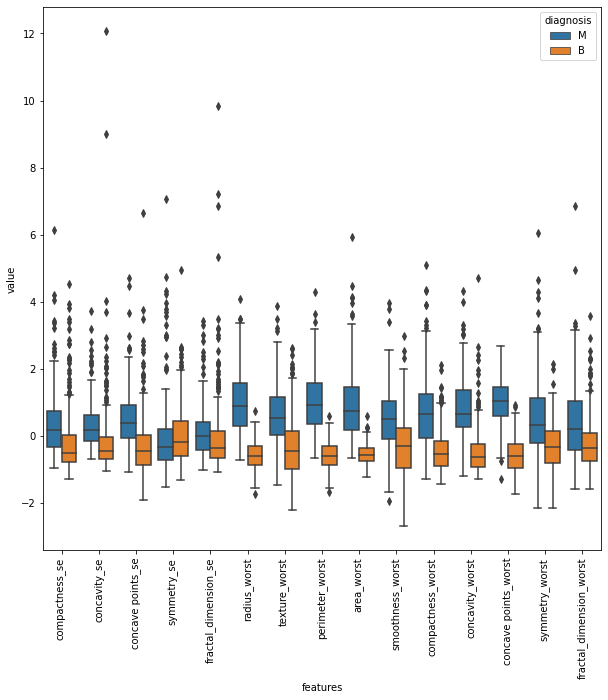

In [48]:
plt.figure(figsize=(10,10))
sb.boxplot(x="features", y="value", hue="diagnosis", data=data_new)
plt.xticks(rotation=90)

In [ ]:
#naive approach to drop without PCA

In [52]:
corr_matrix = data.corr().abs()
threshold = 0.95
high_corr_var=np.where(corr_matrix>threshold)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('radius_se', 'perimeter_se'), ('radius_se', 'area_se'), ('radius_worst', 'perimeter_worst'), ('radius_worst', 'area_worst'), ('perimeter_worst', 'area_worst')]


In [64]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
print(to_drop)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [ ]:
#PCA 

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
X_scaled = StandardScaler().fit_transform(data_n_2)

In [117]:
pca_initial = decomposition.PCA()
pcafit = pca_initial.fit_transform(X_scaled,y)
var_explained = pca_initial.explained_variance_ratio_ #ratio of variance each PC explains
###Since 29 components aren't necessary, the last 20 PCs will be disregarded 
###since they explain less than.01 of the variance
print(sum(var_explained[0:2]))
print(sum(var_explained[0:6]))
print(sum(var_explained[0:7]))
print(sum(var_explained[0:10]))
print(sum(var_explained[0:15]))
print(sum(var_explained[0:20]))
print(sum(var_explained[0:30]))
##indeed,the first 10 PCs explain 95% of the variance

0.6324320765155941
0.8875879635669056
0.9100953006967307
0.9515688143366666
0.9864881227145468
0.9955720432628137
1.0


Projecting 30-dimensional data to 2D


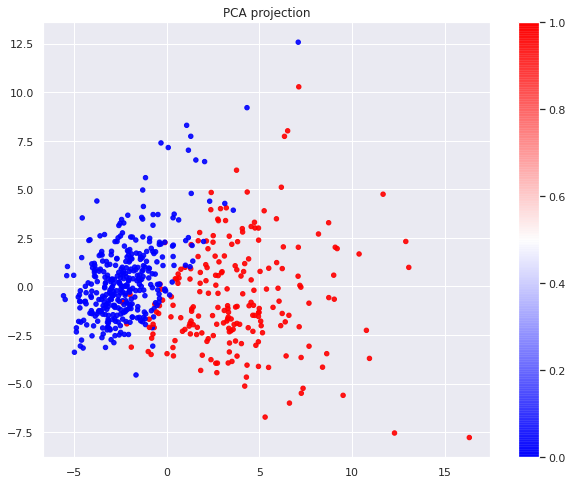

In [113]:
pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)
print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])
plt.figure(figsize=(10,8))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=data['diagnosis'], alpha=0.9, s=20, cmap='bwr');
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

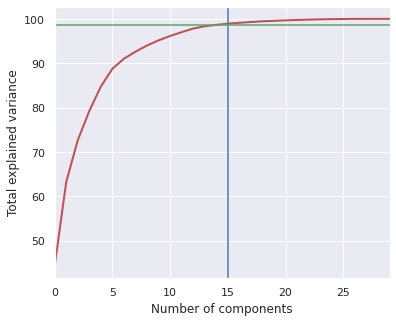

In [130]:
pca = decomposition.PCA().fit(X_scaled)
plt.figure(figsize=(6,5))
plt.plot(100*np.cumsum(pca.explained_variance_ratio_), color='r', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.axvline(15, c='b')
plt.axhline(98.7, c='g')
plt.show();


Size: 
(569, 7)


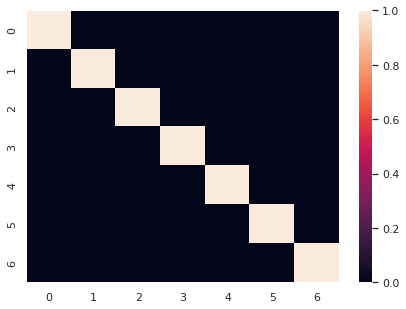

In [173]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
dimension = 7
pca = PCA(n_components=dimension)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
# print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

fig = plt.figure(figsize=(7, 5))
sb.heatmap(X_pca.corr())


Train accuracy: 0.98
Test accuracy: 0.96
Test Recall: 0.93

Test confusion_matrix


Text(30.5, 0.5, 'True')

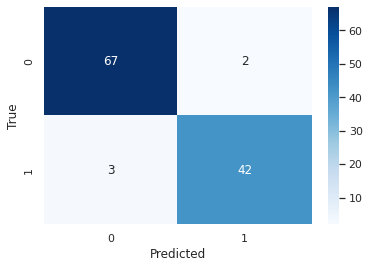

In [174]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, 
                                                            shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("Test Recall:", np.round(cf_matrix[1][1]/(cf_matrix[1][1]+cf_matrix[1][0]),2))
print("\nTest confusion_matrix")
sb.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [175]:
data_pure = pd.read_csv("data.csv")
data_pure = data_pure.drop('Unnamed: 32', 1)
data_pure = data_pure.drop('id', 1)

X = data_pure.drop('diagnosis',1)
data_pure['diagnosis']  = data_pure['diagnosis'].map({'M': 1, 'B':0})
y = pd.Series(data_pure.diagnosis)

Train accuracy: 0.97
Test accuracy: 0.93
Test Recall: 0.91

Test confusion_matrix


Text(30.5, 0.5, 'True')

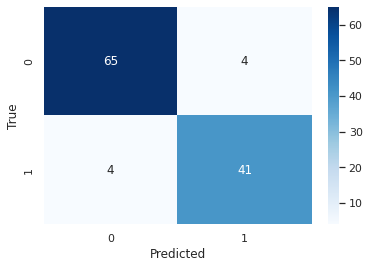

In [176]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)

print("Test Recall:", np.round(cf_matrix[1][1]/(cf_matrix[1][1]+cf_matrix[1][0]),2))
print("\nTest confusion_matrix")
sb.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)